In [63]:
# Download and Install Missing Packages
#!pip install numpy
#!pip install pandas
#!pip install geopandas
#!pip install seaborn
#!pip install matplotlib
#!pip install folium matplotlib mapclassify

## **Know Your Data**

### **Knowing your data is vital for Data Analysis**

**RMs in Saskatchewan** have 2 part (e.g Rural Municipality of Excel No. 71):

    - Number
    - Name

There are 2 csv files that contains RM Names or Numbers or Both (e.g):
 
    - 71
    - OPPORTUNITY
    - MUNICIPAL DISTRICT OF OPPORTUNITY NO. 17)

- **Preapare the data in CSV files for Comparison and Merging**

**Steps** to get unique list of RM Names or Numbers or Both from CSV files using following data cleaning steps:

        - Data is alphnumeric
        - There is only one column
        - RM is the column name
        - Concatenate both Files data using column name "RM"
        - Strip the white spaces
        - Convert the data to one case (lower/upper), I am using upper case
        - remove duplicate values / get unique values


- **Preapare the data in Shape file for Comparison and Merging**

**Steps** to compare the RM Numbers (RMNO) or RM Name (RMNM) in Shape file with unique list of RM Names in csv files to get final list using the following data cleaning steps:

        - Read shape file data into dataframe
        - Data in RMNO column is string and has '0' appended in the start of numbers e.g '071','999' or '998'
        - Create a subset of dataframe with only RMNO and RMNM for comparison with CSV's final unique list
        - Type Cast RMNO column to integer to perform a comparison
        - Rename the RMNO column to RM and also Type cast to String for comparison
        - Merge 2 datasets (Subset of dataframe with CSV final list) by using 'inner' comparison (Use RMNO or RMNM )
        - Merge Shape file original datafame with the results of the previous step output based on RMNO or RMNM field
        - Count the number of rows in results using RMNO or RMNM
        - Plot the final dataframe
        - Explore the dataframe to see RMNO and RM field values e.g '71', '071'


**Note: I have performed the comparison using both fields:**

    - With RM Number, there are 296 rows out of total 298 in shapefile
    - With RM Name, there are 10 rows out of total 298 in shapefile



**-------------------------------------------------------------------------------------------------------**

**----------------------------------Assignment 1-----------------------------------------------------**

**-------------------------------------------------------------------------------------------------------**

**You must run this notebook in your local machine to print your credentials**

In [2]:
import datetime # Date time 
import socket # Low Level Networking

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Assignment 1: Solutions by Imran Afsar') # Please change your name here
print('Local Time:', local_time)
print('Computer ID:', computer_id)

Assignment 1: Solutions by Imran Afsar
Local Time: 2024-05-13 23:35:32
Computer ID: DESKTOP-NRI4M0G


In [2]:
# importing required libraries
import pandas as pd # Pandas
import numpy as np  # NumPy
import geopandas as gpd # GIS of Pandas
import seaborn as sb # Parof of matplotlib for Data Viz
import matplotlib.pyplot as plt # data viz
import datetime # Date time 
import socket # Low Level Networking

In [3]:
# Import Libraries Pandas, NumPy, Geopandas, Matplotlib, Seaborn

## Your code down ##

## Your code write up##

In [54]:
# Set url path to data files located in GitHub
url_df_1 = 'https://github.com/imranafsar/Palette_Cohort_6/blob/Afsar-Cohort6/Afsar-Assignments-Cohort6/df_1.csv?raw=true'
url_df_2 = 'https://github.com/imranafsar/Palette_Cohort_6/blob/Afsar-Cohort6/Afsar-Assignments-Cohort6/df_2.csv?raw=true'
url_shp  = '/vsicurl/https://github.com/imranafsar/Palette_Cohort_6/Data/SK_RM_Shapefiles/RuralMunicipality.zip'

# Set the path where final list of unique RMs created from 2 CSVs
url_df_merge = 'C:\\PythonProjects\\PSStream3\\url_df_merge.csv'

In [55]:
# Defining Directories

directory_main = 'C:/PythonProjects/PSStream3'

#GIS
directory_gis= directory_main + '/RuralMunicipality.shp'

## Question 1

**Follow the instructions in slack**


In [5]:
# Read CSV files
df_1 = pd.read_csv(url_df_1)
df_2 = pd.read_csv(url_df_2)


#Total count of RM's in each csv file
print('Total RMs in df_1.csv: ',df_1.count())
print('Total RMs in df_2.csv: ',df_2.count())


Total RMs in df_1.csv:  RM    477
dtype: int64
Total RMs in df_2.csv:  RM    464
dtype: int64


In [64]:
# Strip the white spaces and change to upper case for the RM names for case sensitive comparison
df_1_CS = df_1['RM'].str.upper().str.strip()
df_2_CS = df_2['RM'].str.upper().str.strip()

#print(df_1_CS.to_string())
#print(df_1_CS.to_string())

In [7]:
# Concatenate the first column in both CSV data files
df_12_merge = pd.concat( [df_1_CS,df_2_CS],axis=0)

print('Total RMs after merging both CSV files: ',df_12_merge.count())

Total RMs after merging both CSV files:  941


In [87]:
# Drop the duplicate values in the merge list of RMs
df_12_merge_clean = df_12_merge.sort_values(na_position='first').drop_duplicates().reset_index(drop=True)
print('Total Unique RMs after merging both CSV files: ',df_12_merge_clean.count())

#df_12_merge_clean.unique()

Total Unique RMs after merging both CSV files:  502


In [88]:
#print(df_12_merge_clean.to_string())

In [89]:
# Save the merged results on disk in a csv file
#df_12_merge_clean.to_csv(url_df_merge, sep='\t', encoding='utf-8')

## Question 2

**Merge Shapefile(provided in Cohort 6 Repo) and create a map by using DataFrame.plot() with cleaned and maximized number of RMs in df_1**

# GIS Data Preparation

In [10]:
directory_gis

'C:/PythonProjects/PSStream3/RuralMunicipality.shp'

In [80]:
# Reading GIS Data
gdf_rm=gpd.read_file(directory_gis)

<Axes: >

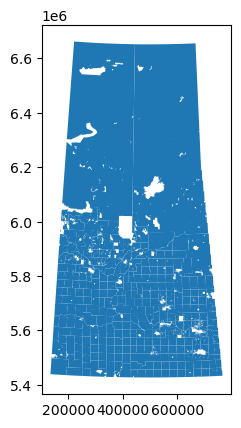

In [81]:
#Print Shape file Geometry data
gdf_rm.plot()

In [82]:
# Changin CRS system to regular lon and lat
gdf_rm =gdf_rm.to_crs(4326)

<Axes: >

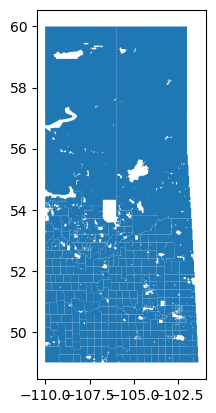

In [83]:
#Print Shape file Geometry data
gdf_rm.plot()

In [84]:
# Select approriate fields for further analysis
gdf_rm_clean=gdf_rm[['RMNO', 'RMNM']]



<Axes: >

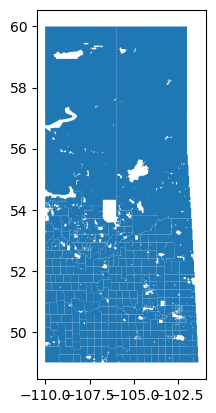

In [14]:
gdf_rm_clean.plot()

In [93]:
# Need to type cast RM column type from Object to Integer for comparison with RM Unique list generated from csv files
gdf_rm_clean['RMNO']=gdf_rm_clean['RMNO'].astype(int)

#print(gdf_rm_clean['RMNO'].to_string())

In [95]:
#gdf_rm_clean.plot()

In [96]:
gdf_rm_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RMNO    298 non-null    int32 
 1   RMNM    298 non-null    object
dtypes: int32(1), object(1)
memory usage: 3.6+ KB


In [98]:
# Merging final RM data with GIS data based on RM Number columns in both data sets
# Also rename the column name in GIS Data to RM for merge function

gdf_rm_final_RMNO = pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}).astype('str'), df_12_merge_rd, on='RM', how='inner')

# Merging final RM data with GIS data based on RM Name columns in both data sets
# Also rename the column name in GIS Data to RM for merge function

gdf_rm_final_RMNM = pd.merge(gdf_rm_clean.rename(columns={'RMNM':'RM'}).astype('str', errors='ignore'), df_12_merge_rd_upper, on='RM', how='inner')



In [101]:
print ('Total RMs after comparing RM Numbers :',gdf_rm_final_RMNO.count())

print ('Total RMs after comparing RM Numbers :',gdf_rm_final_RMNM.count())

Total RMs after comparing RM Numbers : RM      296
RMNM    296
dtype: int64
Total RMs after comparing RM Numbers : RMNO    10
RM      10
dtype: int64


In [102]:
gdf_rm_final_RMNM

,RMNO,RM
0,318,MOUNTAIN VIEW
1,1,ARGYLE
2,458,WILLOW CREEK
3,349,GRANDVIEW
4,287,ST. ANDREWS
5,215,STANLEY
6,190,DUFFERIN
7,460,BIRCH HILLS
8,312,MORRIS
9,283,ROSEDALE


In [100]:
gdf_rm_final_RMNO.info()

gdf_rm_final_RMNM.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RM      296 non-null    object
 1   RMNM    296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RMNO    10 non-null     object
 1   RM      10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [106]:
# Select approriate fields for further analysis
gdf_rm_final_clean=gdf_rm_final_RMNO[[ 'RM','RMNM']]

#gdf_rm_final_clean=gdf_rm_final_RMNO[[ 'RMNM']]

In [107]:
gdf_rm_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RM      296 non-null    object
 1   RMNM    296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [108]:
gdf_rm_final_merge=pd.merge(gdf_rm, gdf_rm_final_clean, on='RMNM', how='inner')

In [110]:
gdf_rm_final_merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PPID        296 non-null    object  
 1   EFFDT       296 non-null    object  
 2   EXPDT       0 non-null      object  
 3   FEATURECD   296 non-null    object  
 4   RMNO        296 non-null    object  
 5   RMNM        296 non-null    object  
 6   SHAPE_AREA  296 non-null    float64 
 7   SHAPE_LEN   296 non-null    float64 
 8   geometry    296 non-null    geometry
 9   RM          296 non-null    object  
dtypes: float64(2), geometry(1), object(7)
memory usage: 23.3+ KB


<Axes: >

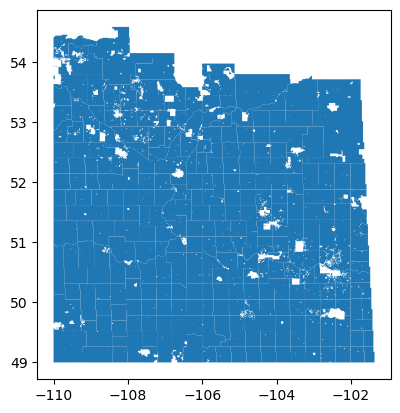

In [109]:
gdf_rm_final_merge.plot()

In [113]:
#gdf_rm_final_merge.explore()